In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install moviepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.3/388.3 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 45.4 MB/s eta 0:00:00
  Created wheel for moviepy: filename=moviepy-1.0.3-py3-none-any.whl size=110712 sha256=e4174462f738ffccab449f13abd7b903eea83e65132a3684eabd60324cdce367
  Stored in directory: /root/.cache/pip/wheels/96/32/2d/e10123bd88fbfc02fed53cc18c80a171d3c87479ed845fa7c1
Successfully built moviepy
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


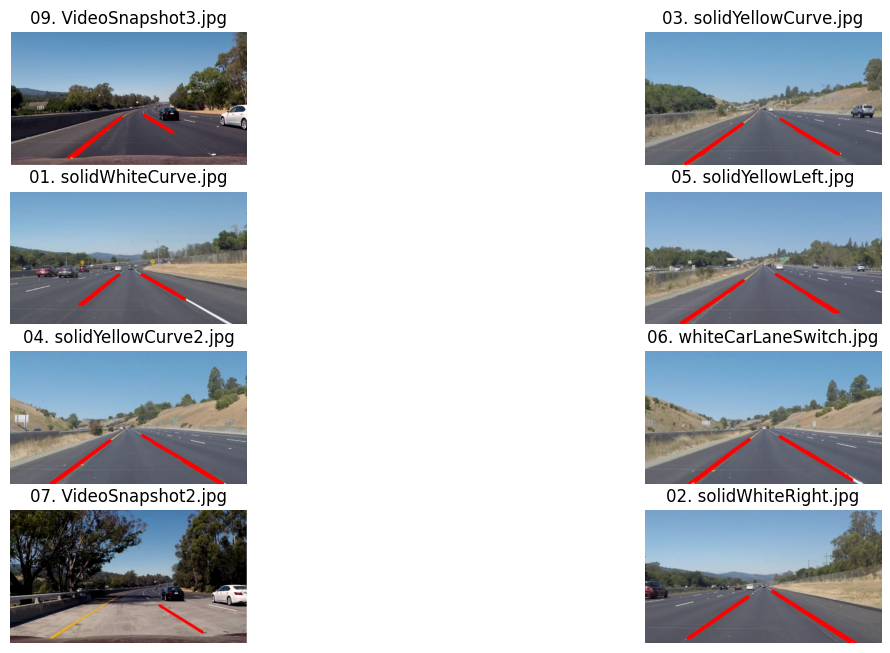

t:   1%|          | 2/221 [05:49<10:38:15, 174.86s/it, now=None]

Moviepy - Building video /content/drive/MyDrive/test_videos_output/solidYellowLeft.mp4.
Moviepy - Writing video /content/drive/MyDrive/test_videos_output/solidYellowLeft.mp4




t:   1%|          | 2/221 [05:55<10:48:13, 177.60s/it, now=None]

Moviepy - Done !
Moviepy - video ready /content/drive/MyDrive/test_videos_output/solidYellowLeft.mp4


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
from moviepy.editor import VideoFileClip

# 1. Grayscale Conversion
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# 2. Apply Color Selection
def apply_color_selection(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    lower_white = np.array([200])
    upper_white = np.array([255])
    mask = cv2.inRange(gray_img, lower_white, upper_white)
    masked_image = cv2.bitwise_and(image, image, mask=mask)
    return masked_image

# 3. Region of Interest Selection
def region_of_interest(img):
    height = img.shape[0]
    width = img.shape[1]
    region = np.array([[
        (int(0.1 * width), height),
        (int(0.9 * width), height),
        (int(0.55 * width), int(0.6 * height)),
        (int(0.45 * width), int(0.6 * height))
    ]], dtype=np.int32)
    mask = np.zeros_like(img)
    cv2.fillPoly(mask, region, 255)
    masked_img = cv2.bitwise_and(img, mask)
    return masked_img

# 4. Edge Detection Using Canny
def detect_edges(image):
    gray_img = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    blur_img = cv2.GaussianBlur(gray_img, (5, 5), 0)
    edges = cv2.Canny(blur_img, 50, 150)
    return edges

# 5. Hough Line Transformation
def hough_lines_detection(image):
    lines = cv2.HoughLinesP(image,
                            rho=2,
                            theta=np.pi/180,
                            threshold=50,
                            minLineLength=100,
                            maxLineGap=160)
    return lines

# 6. Draw Lane Lines
def draw_lane_lines(image, lines):
    lane_image = np.copy(image)
    if lines is not None:
        for line in lines:
            for x1, y1, x2, y2 in line:
                cv2.line(lane_image, (x1, y1), (x2, y2), (255, 0, 0), 10)
    return lane_image

# 7. Pipeline for Lane Detection
def lane_detection_pipeline(image):
    color_filtered_img = apply_color_selection(image)
    roi_img = region_of_interest(color_filtered_img)
    edges_img = detect_edges(roi_img)
    lines = hough_lines_detection(edges_img)
    lane_lines_img = draw_lane_lines(image, lines)
    return lane_lines_img

# 8. Apply Pipeline to Test Images
def apply_pipeline_to_test_images():
    image_dir = "/content/drive/MyDrive/test_images/"
    images = os.listdir(image_dir)

    plt.figure(figsize=(15, 10))
    for i, image_file in enumerate(images):
        img_path = os.path.join(image_dir, image_file)
        img = mpimg.imread(img_path)
        lane_lines_img = lane_detection_pipeline(img)

        plt.subplot(5,2, i + 1)
        plt.imshow(lane_lines_img)
        plt.title(image_file)
        plt.axis('off')
    plt.show()

apply_pipeline_to_test_images()

# 9. Processing a Video
def process_video(input_video, output_video):
    video_clip = VideoFileClip(input_video)
    processed_video = video_clip.fl_image(lane_detection_pipeline)
    processed_video.write_videofile(output_video, audio=False)

# Example usage
input_video_path = "/content/drive/MyDrive/test_videos/solidYellowLeft.mp4"
output_video_path = "/content/drive/MyDrive/test_videos_output/solidYellowLeft.mp4"
process_video(input_video_path, output_video_path)
